# Movies Genre Classification - NLP

Predicting the genre of movie from just 1000 characters of the script.

In [67]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [68]:
# Loading the dataset
df = pd.read_csv('kaggle_movie_train.csv')

# Exploring the dataset

In [69]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [70]:
df.shape

(22579, 3)

In [71]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [72]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

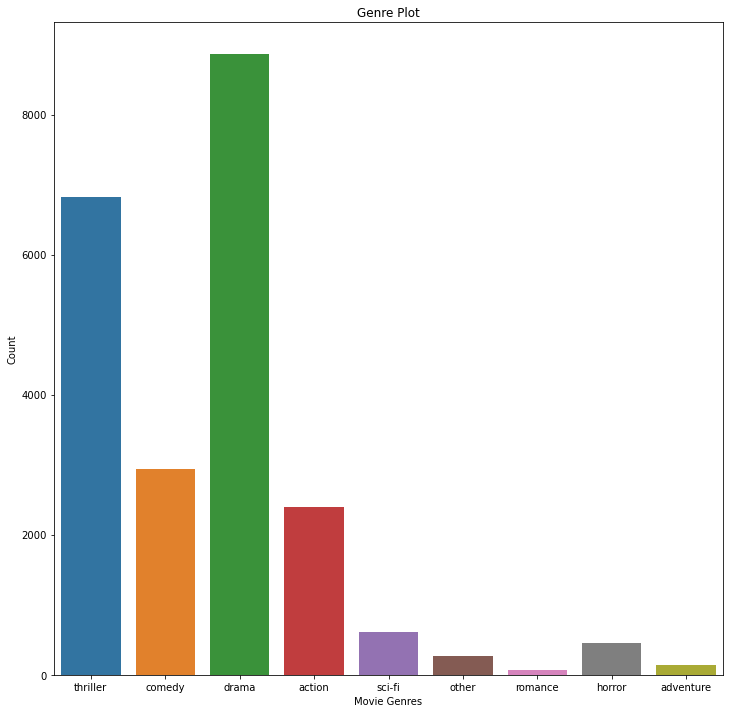

In [73]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# Data Cleaning and Preprocessing

In [74]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [75]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [76]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [77]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [62]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAZIRAHMADNAZIR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
df.shape

(22579, 2)

In [78]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
  
  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [80]:
len(corpus)

22579

In [81]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [82]:
len(corpus)

22579

In [85]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

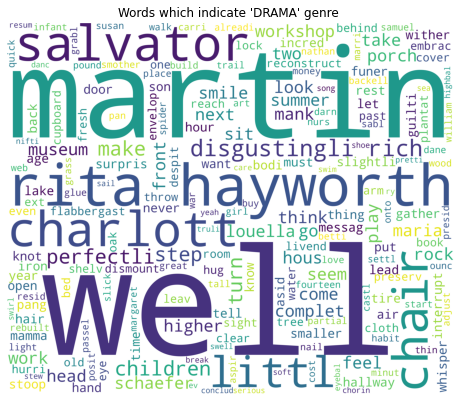

In [88]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

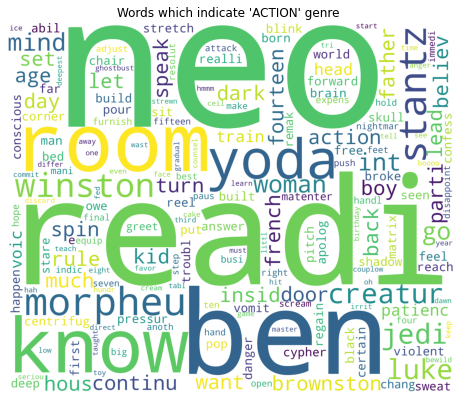

In [89]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

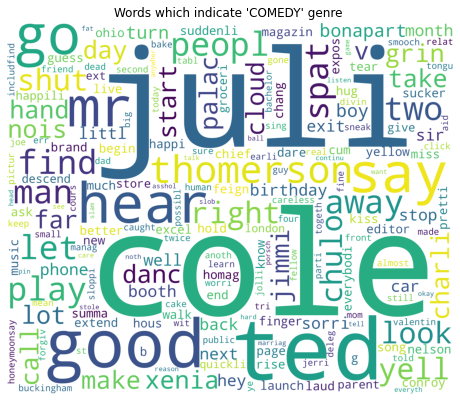

In [90]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [93]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus)

In [94]:
y = df['genre'].values

# Model Building

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


# Multinomial Naive Bayes

In [96]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [97]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [98]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.55%


In [99]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [100]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   4,   41,    1,   37, 1607,   21,    1,   11,  104],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   12,    0,   22, 1172]],
      dtype=int64)

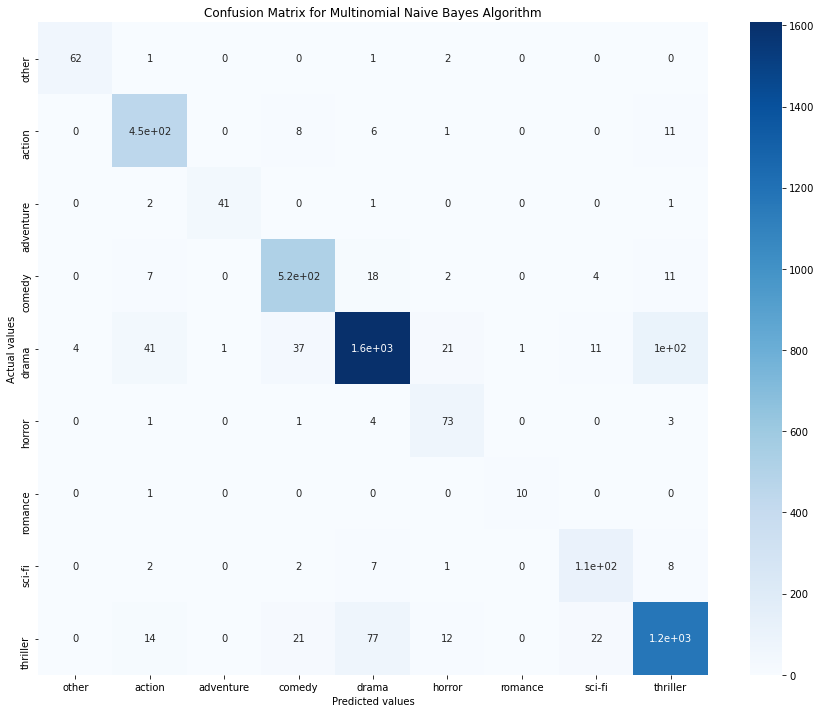

In [101]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [102]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.32%
Accuracy score for alpha=0.2 is: 91.03%
Accuracy score for alpha=0.3 is: 90.79%
Accuracy score for alpha=0.4 is: 90.54%
Accuracy score for alpha=0.5 is: 90.21%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 89.99%
Accuracy score for alpha=0.8 is: 89.9%
Accuracy score for alpha=0.9 is: 89.73%
Accuracy score for alpha=1.0 is: 89.55%
--------------------------------------------
The best accuracy is 91.32% with alpha value as 0.1


In [103]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Predictions

In [104]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [105]:
# For generating random integer
from random import randint

In [106]:
# Loading test dataset
test = pd.read_csv('kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [107]:
test.shape

(5589, 2)

In [108]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [109]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: . Jean lies curled up on the ground, trying to talk. KID 2 What's he saying? BASQUIAT I'm SAMO... I'm SAMO... KID 3 bending close He says he's SAMO. Kid 1 whacks him in the back once more for good measure. KID 1 He wish. DISSOLVE TO THE SEA It is flat, dead, gray. Ominous and waiting. INT. GREAT JONES ST. LOFT DAY Washed in sunlight, a large painting leans against the wall, the words HAITIAN BASEBALL FACTORIES scrawled through its center. Jean lays down, watching TV. He looks older now, more worn. His face is slightly swollen. His complexion is discolored. Shenge covers a triptych with wide brush strokes of yellow paint. He circles a large, primitive figure of a black man drawn with magic marker in the center. He is careful to leave the figure intact. BASQUIAT Paint it out. SHENGE Out? BASQUIAT Yeah... Maybe just his arms. Shenge paints out the arms Put some Cerulean Blue there. Jean points to the lower corner. Shenge picks up the phone, which has been RINGING for some time. SH

In [110]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  sits at the bar speaking to an attractive Woman nearby, a MAN puts is USA Today on the bar and addresses the BARTENDER. MAN I see photos of a lot of dead writers on these walls. Got any living ones? I have a story to tell that could win one of them a Pulitzer. then, with enthusiasm Picture this, if you will. A small town in Maryland, a sleepy little village, within that a hardware store... The Man continues speaking as Ike and the woman continue their conversation. WOMAN So what's in store for us in tomorrow's column? IKE I don't know yet. I'm kind of a last minute man. Ideas don't flow until an hour or two before deadline. The Woman gets up and begins throwing darts. WOMAN interrupting This is very interesting. You get your ideas for your column from life. You start up a conversation with a woman in a bar, attack her choice of reading material, try and get a rise out of her while you contemplate whether or not she's worth hitting on. IKE No, I can't hit on you until I get an 

In [111]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: sper starts to clap with his beer in his hand. He starts to smile really big. Telly sees Casper smiling and then he begins to smile. CASPER Man, this guy is really good. TELLY He looks like my uncle. Casper looks at the money collection. CASPER I bet he makes hella money. A train comes speeding by. Casper walks next to the Blind Guy and starts dancing really funny. Telly starts to laugh. Some guy in a business suit walks by and throws some change in the collection. INT. TESTING CLINIC WAITING ROOM DAY Typical waiting room. Big sofas and chairs. A table is in the middle of the floor, magazines and pocketbooks. A water jug is in the corner. A ceiling fan is circling fast up above. An assortment of men and women of different races and colors. They look mainly middle class. Jennie and Ruby are the youngest people in the room. A man in a three piece suit slowly walks by. Jennie tries to see his face but he is turned the wrong way. Ruby continues to talk. The same fat black nurse wal

In [112]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: What turned you around? Why would you want to kill a dog? With LONG firmly on the hook, RORSCHACH settles back to elucidate RORSCHACH One night I opened my eyes saw the world. 147. EXT. WAREHOUSE DISTRICT DUSK FLASHBACK Ruined buildings, broken windows. The streets are silent except for the distant sound of dogs BARKING. RORSCHACH'S NARRATION continues OVER SCENE RORSCHACH V.O. '75. Kidnap case, the little Franco girl. Weeks dragged by no word. Thought of little child, alone, frightened . . . decided to intervene. The lone figure of RORSCHACH emerges from the shadows and turns up his collar. He strides deliberately down the sidewalk past a ramshackle wooden storm fence covered with obscene graffiti. RORSCHACH V.O., cont. Got a tip. Abandoned dress factory in Brooklyn. He peers through a broken slat in the fence. In a side yard, TWO HUGE GERMAN SHEPHERDS growl playfully, fighting over some unseen object. 148. INT. DRESS FACTORY DUSK FLASHBACK A DOOR swings open and RORSCHACH ent

In [113]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  Learn how to speak English first. D. Radio Raheem points to the D batteries behind the counter. CLOSE KOREAN CLERK KOREAN CLERK How many you say? CLOSE RADIO RAHEEM RADIO RAHEEM Twenty! Motherfucker! Twenty! CLOSE KOREAN CLERK KOREAN CLERK Motherfucker you. Radio Raheem has to laugh at that one. 57. RADIO RAHEEM Motherfucker you. You're alright. You're alright. Just gimme my twenty Duracells, please. EXT FRUIT N VEG DELIGHT DUSK Da Mayor is looking at a bunch of cut flowers when Radio Raheem comes out with batteries in hand finally. EXT MOTHER SISTER'S STOOP DUSK ANGLE WINDOW Mother Sister is sitting in her window as usual. ANGLE STOOP Da Mayor walks up the stoop with a bunch of fresh cut flowers in a discarded wine bottle for a vase. ANGLE DA MAYOR Da Mayor holds them out for Mother Sister, who does not acknowledge him at all. DA MAYOR I'd thought you might like these... I guess not. Da Mayor takes a seat on the stoop and puts the flowers to his face. DA MAYOR Ain't nuthin' l